## Let's look at boundary and label monotonicity in Hierarchical labels: SALAMI.


In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Let's get the directory of jams files:
import os, jams, mir_eval, bnl
import numpy as np
import xarray as xr

['10.jams', '100.jams', '1000.jams', '1002.jams', '1003.jams', '1004.jams', '1005.jams', '1006.jams', '1007.jams', '1008.jams', '101.jams', '1010.jams', '1011.jams', '1012.jams', '1013.jams', '1014.jams', '1015.jams', '1016.jams', '1018.jams', '1019.jams', '1020.jams', '1021.jams', '1022.jams', '1023.jams', '1024.jams', '1026.jams', '1027.jams', '1028.jams', '103.jams', '1032.jams', '1034.jams', '1035.jams', '1036.jams', '1037.jams', '1038.jams', '1039.jams', '104.jams', '1042.jams', '1043.jams', '1044.jams', '1045.jams', '1046.jams', '1047.jams', '1048.jams', '1050.jams', '1051.jams', '1053.jams', '1054.jams', '1055.jams', '1056.jams', '1058.jams', '1059.jams', '1060.jams', '1061.jams', '1062.jams', '1063.jams', '1064.jams', '1066.jams', '1067.jams', '1068.jams', '1069.jams', '107.jams', '1070.jams', '1071.jams', '1072.jams', '1074.jams', '1075.jams', '1076.jams', '1077.jams', '1078.jams', '1079.jams', '108.jams', '1080.jams', '1082.jams', '1083.jams', '1084.jams', '1085.jams', '1086.

In [4]:
def load_jams(tid):
    jams_path = os.path.join(salami_jams_dir, tid + '.jams')
    return jams.load(jams_path)

def get_salami_tids(salami_jams_dir='/Users/xi/data/salami-jams'):
    found_jams_files = os.listdir(salami_jams_dir)
    tids = sorted([os.path.splitext(f)[0] for f in found_jams_files])
    return tids

In [ ]:
# TODO:  need to move the expand hierarchy code to bnl from ssdm

In [38]:
# Let's do it on 1 file, and see if upper and lower bounds are monotonic

def get_hiers(tid):
    jam = load_jams(str(tid))
    duration = jam.file_metadata.duration
    upper = jam.search(namespace='segment_salami_upper')
    lower = jam.search(namespace='segment_salami_lower')
    anno_h_list = []
    for anno_id in range(len(upper)):
        upper[anno_id].duration = duration
        lower[anno_id].duration = duration
        anno_h = bnl.multi2H(bnl.fmt.openseg2multi([upper[anno_id], lower[anno_id]]))
        anno_h_list.append(anno_h)
    return anno_h_list

get_hiers(10)


[<bnl.core.H at 0x12a5881f0>, <bnl.core.H at 0x12aea1ee0>]

In [ ]:
# Let's do it on all files
from tqdm import tqdm

for tid in tqdm(get_salami_tids()):
    hiers = get_hiers(tid)
    for anno_id, h in enumerate(hiers):
        if not h.has_mono_B():
            print(f'{tid} annotator {anno_id} has non-monotonic boundaries!')

## Everything has monotonic boundaries!

100%|██████████| 1359/1359 [00:33<00:00, 39.97it/s]


(<Figure size 800x500 with 2 Axes>,
 array([<Axes: >, <Axes: xlabel='Time'>], dtype=object))

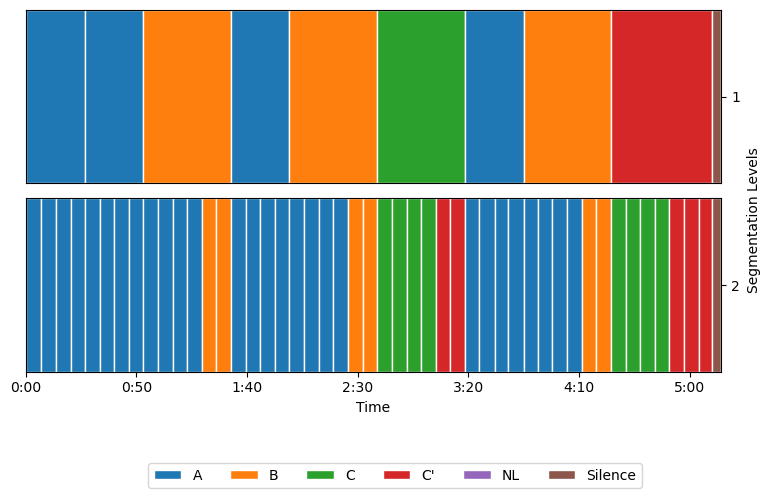

In [19]:
hiers[1].plot()

In [11]:
jam.file_metadata.duration

314.26934300000005